<a href="https://colab.research.google.com/github/DaverArenas/procesamientoSe-alesInteligenciaArtificial/blob/main/Copia_de_Clase3E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de series de tiempo

Para este ejercicio analizaremos los datos de los casos diagnósticados como positivos para COVID-19  👾

In [1]:
import pandas as pd 
import numpy as np                                
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22,9/13/22,9/14/22,9/15/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,194614,195012,195298,195471,195631,195925,196182,196404,196751,196870
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330283,330516,330687,330842,330948,331036,331053,331191,331295,331384
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270476,270489,270507,270522,270532,270539,270551,270551,270570,270584
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46027,46113,46113,46113,46113,46113,46113,46113,46147,46147
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,103131,103131,103131,103131,103131,103131,103131


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22,9/13/22,9/14/22,9/15/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7783,7785,7786,7786,7787,7787,7789,7791,7792,7792
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3583,3584,3584,3584,3584,3584,3585,3586,3586,3586
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6879,6879,6879,6879,6879,6879,6879,6879,6879,6879
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,155,155,155,155,155,155,155,155,155
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [6]:
cols = confirmed_df.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/6/22', '9/7/22', '9/8/22', '9/9/22', '9/10/22', '9/11/22', '9/12/22',
       '9/13/22', '9/14/22', '9/15/22'],
      dtype='object', length=972)


In [7]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [8]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22,9/13/22,9/14/22,9/15/22
0,0,0,0,0,0,0,0,0,0,0,...,194614,195012,195298,195471,195631,195925,196182,196404,196751,196870
1,0,0,0,0,0,0,0,0,0,0,...,330283,330516,330687,330842,330948,331036,331053,331191,331295,331384
2,0,0,0,0,0,0,0,0,0,0,...,270476,270489,270507,270522,270532,270539,270551,270551,270570,270584
3,0,0,0,0,0,0,0,0,0,0,...,46027,46113,46113,46113,46113,46113,46113,46113,46147,46147
4,0,0,0,0,0,0,0,0,0,0,...,102636,102636,102636,103131,103131,103131,103131,103131,103131,103131


Vamos a sumar los casos por país, para poder trabajar fácilmente con el dataframe

In [ ]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/1/22', '9/2/22', '9/3/22', '9/4/22', '9/5/22', '9/6/22', '9/7/22',
       '9/8/22', '9/9/22', '9/10/22'],
      dtype='object', length=963)

In [ ]:
world_cases = []
total_deaths = [] 
mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
  
world_cases_df = pd.DataFrame([dates,world_cases])
world_cases_df = world_cases_df.transpose()
world_cases_df.columns = ['dates', 'cases']


total_deaths_df = pd.DataFrame([dates,total_deaths])
total_deaths_df = total_deaths_df.transpose()
total_deaths_df.columns = ['dates', 'deaths']


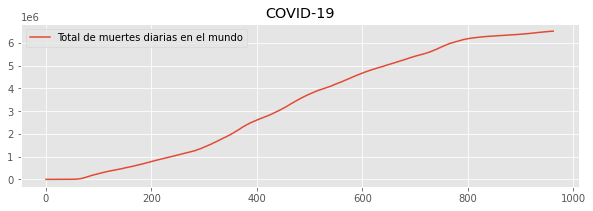

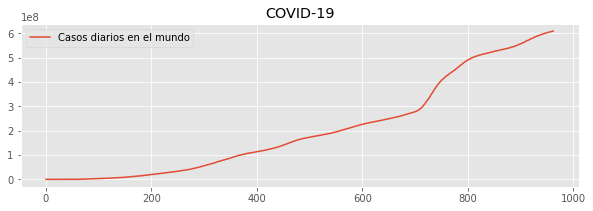

In [ ]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(10,3))
  plt.plot(total_deaths_df.deaths,  label = "Total de muertes diarias en el mundo")
  plt.title('COVID-19')
  plt.legend()
  plt.show()
  plt.figure(figsize =(10,3))
  plt.plot(world_cases_df.cases,  label = "Casos diarios en el mundo")
  plt.title('COVID-19')
  plt.legend()
  plt.show()

# Procesamiento

Si vemos las gráficas anteriores nos muestran la acumulación de casos de COVID en el tiempo, sin embargo no nos permiten describir el comportamiento día a día de lo que está sucediendo con los contagios y las muertes. 
Por lo tanto, realizaremos un procesamiento en el cual calcularemos la diferencia entre los valores diarios para tener información relevante de la tendencia diaria de los contagios y las muertes. 

Adicionalmente, como son muchos valores en el tiempo podemos realizar un filtro d media móvil, lo cual nos va a permitir suavizar la señal y tener una primera aproximación sobre como será el comportamiento de la señal en el tiempo. Es decir, asumiremos que el valor futuro de nuestras variables depende de sus $k$ valores anteriores.

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def maFilter(x, N):   # N ventana de tiempo                        
  xTemp = np.zeros([len(x) + (N-1)])
  xTemp[(N-1):] = x
  y = np.zeros(len(x))
  
  for i in range(0, len(x)):
    y[i] = xTemp[i:i +N]. sum() / float(N)
  return y

In [ ]:
window = 7
world_daily_increase = daily_increase(world_cases_df.cases)
world_daily_increase_avg = maFilter(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths_df.deaths)
world_daily_death_avg = maFilter(world_daily_death, window)


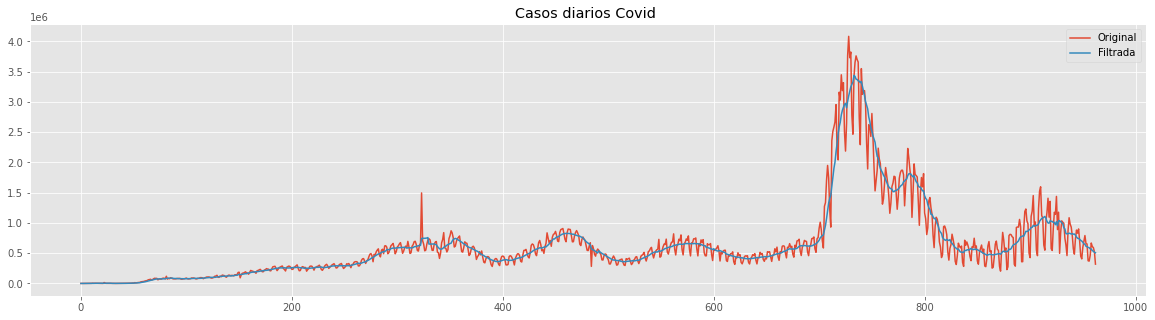

In [ ]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,5))
  plt.plot(world_daily_increase, label = "Original")
  plt.plot(world_daily_increase_avg,  label = "Filtrada")

  plt.title("Casos diarios Covid ")
  plt.legend()

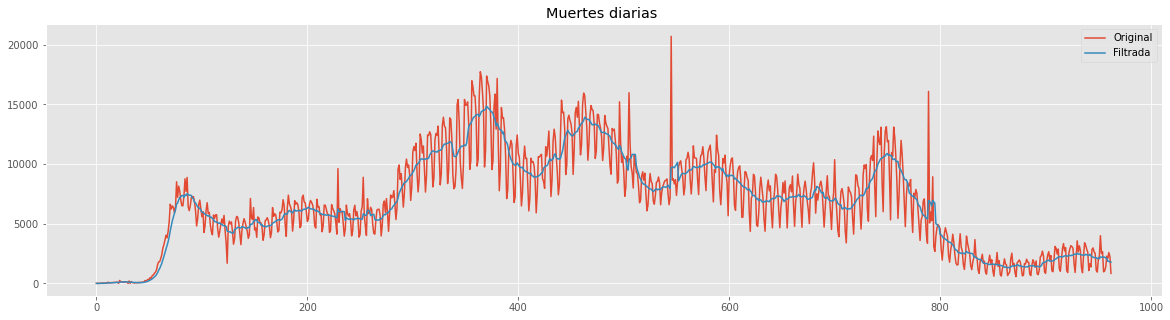

In [ ]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,5))
  plt.plot(world_daily_death, label = "Original")
  plt.plot(world_daily_death_avg,  label = "Filtrada")
  plt.title("Muertes diarias ")
  plt.legend()

## Calidad del pronóstico

Para realizar un adecuado pronóstico es importante tener en cuenta las métricas que nos permitiran estimar si el pronóstico que se realizó es adecuado

* **$R^2$**: coeficiente de determinación (en econometría, esto puede interpretarse como el porcentaje de varianza explicado por el modelo). Se puede calcular utilizando la función `sklearn.metrics.r2_score`

* **Error absoluto medio ($MAE$)**: se trata de una métrica interpretable de la medida de la diferencia entre dos variables continuas. `sklearn.metrics.mean_absolute_error`

* **Mediana del error absoluto ($MedAE$)**: es una medida robusta para los valores atípicos. Se calcula tomando la mediana de todas las diferencias absolutas entre el objetivo y la predicción.  
`sklearn.metrics.median_absolute_error`

* **Error cuadrático medio ($MSE$)**: es una métrica de riesgo correspondiente al valor esperado del error o la pérdida cuadrática `sklearn.metrics.mean_squared_error`

* **Error logarítmico medio al cuadrado ($MSLE$)**: es lo mismo que MSE, pero tomamos el logaritmo de la serie. Como resultado, damos más peso a los pequeños errores también. Esto se utiliza generalmente cuando los datos tienen tendencias exponenciales. `sklearn.metrics.mean_squared_log_error`

* **Error de porcentaje absoluto medio ($MAPE$)**: esto es lo mismo que $MAE$ pero se calcula como porcentaje, lo que es muy conveniente cuando se quiere explicar la calidad del modelo.

```
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100```


In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(10,5))
    plt.title("Media móvil\n Tamaño de la ventana = {}".format(window))
    plt.plot(rolling_mean, "g", label="Tendencia media móvil")

    # Graficar intervalos de confianza para valores suavizados
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Intervalos superior / Inferior")
        plt.plot(lower_bond, "r--")
        
        # Encontrar valores anormales
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Valor actual")
    plt.legend(loc="upper left")
    plt.grid(True)

In [ ]:
window = 7

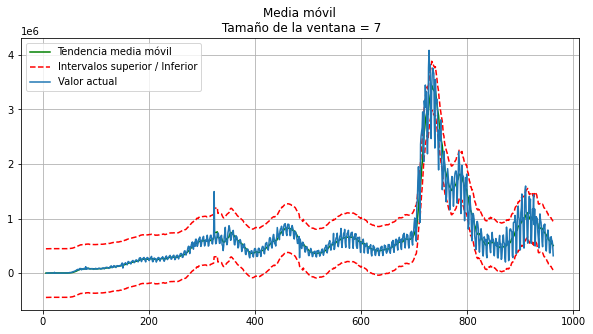

In [ ]:
plotMovingAverage(pd.DataFrame(world_daily_increase), window, plot_intervals=True)

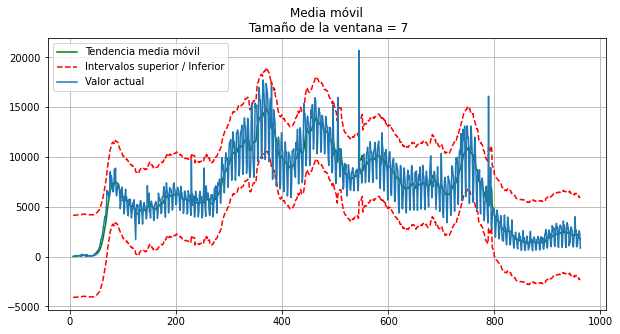

In [ ]:
plotMovingAverage(pd.DataFrame(world_daily_death), window, plot_intervals=True)

Dentro del proceso de análisis vamos a encontrar valores anormales, en este dataset como se puede observar la señal es muy normal sin embargo adicionaremos un punto de anormalidad y lo visualizaremos

Qué pasaría en un mes?

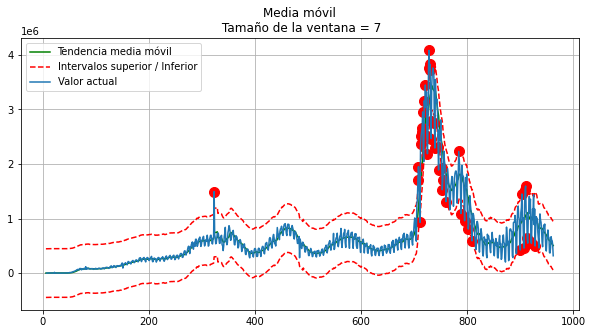

In [ ]:
plotMovingAverage(pd.DataFrame(world_daily_increase), window, plot_intervals=True, plot_anomalies=True)

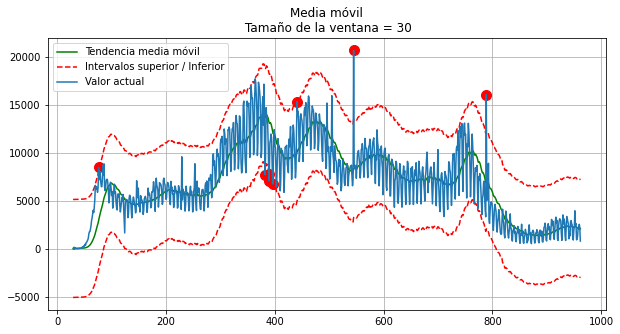

In [ ]:
plotMovingAverage(pd.DataFrame(world_daily_death), 30, plot_intervals=True, plot_anomalies=True)

## Otros modelos
En este caso se puede observar que el suavizado de media móvil permite capturar la estacionalidad mensual.
Sin embargo, podemos realizar otras pruebas considerando modelos más complejos.

Para esto se puede calcular el utilizando el Promedio ponderado que es una modificación de la media móvil, donde se establece un peso de ponderación para realizar el cálculo promedio.

También un método interesante es el suavizado exponencial, donde el valor del modelo es un promedio ponderado entre el valor verdadero actual y los valores del modelo anterior. El peso  $α$  se llama factor de suavización. Define cuán rápidamente "olvidaremos" la última observación verdadera disponible. Cuanto más pequeña es  $α$ , más influencia tienen las observaciones anteriores y más suave es la serie.

La exponencialidad se oculta en la recursividad de la función -- multiplicamos por (1 - α ) cada vez, que ya contiene una multiplicación por (1- α ) de los valores del modelo anterior.

In [ ]:
def exponential_smoothing(series, alpha):
    """
        Parámetro de suavizado alpha - float [0.0, 1.0]
    """
    result = [series[0]] # El primer valor es el mismo de la serie
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plotExponentialSmoothing(series, alphas):
    """
    Gráfica el suavizado exponencial con diferentes alphas        
    """
    plt.figure(figsize=(10, 5))
    plt.plot(series.values, "c", label = "Actual")
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Suavizado exponencial")
    plt.grid(True);

In [ ]:
dates.shape

(963,)

In [ ]:
world_daily_increase_df = pd.DataFrame(world_daily_increase)
world_daily_increase_df.columns = ['data']
world_daily_increase_df['dates'] = world_cases_df['dates']

world_daily_death_df = pd.DataFrame(world_daily_death)
world_daily_death_df.columns = ['data']
world_daily_death_df['dates'] = world_cases_df['dates']


Hacer acercamiento a la señal


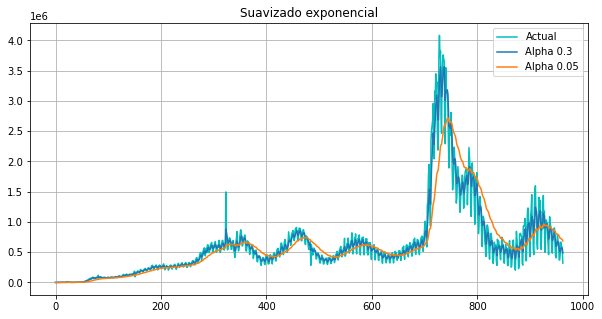

In [ ]:
plotExponentialSmoothing(world_daily_increase_df.data, [0.3, 0.05])

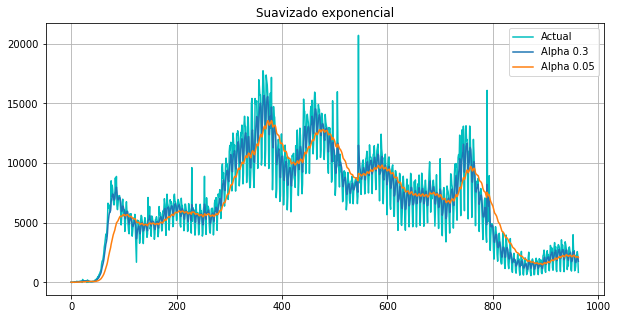

In [ ]:
plotExponentialSmoothing(world_daily_death_df.data, [0.3, 0.05])

Hasta el momento se puede observar la estimación de un solo valor futuro, sin embargo, existen otros métodos como el de doble suavizado exponencial y triple suavizado exponencial que permiten conocer más valores en el futuro, que veremos más adelante.

**Además podemos probar con otros modelos que nos permitan suavizar o filtrar un poco la señal, la idea es que pruebes con los algoritmos vistos en la clase pasada.**



## ✅ Prueba con el Savitzky Golay y con Weiner

## 📈 Forecast

La idea del siguiente algoritmo es poder predecir más valores futuros de la serie temporal que estamos analizando. En este caso vamos a realizar un modelado de la serie a partir de su comportamiento pasado. 

Para esto vamos a utilizar la librería de ```Scikit-learn``` específicamente vamos a utlizar el ```skforest``` que contienen las clases y funciones necesarias para adaptar cualquier modelo a problemas de forecasting

### Entrenamiento 

Para probar otros modelos, es importante definir como se realizará la estimación de los parámetros. 

Recordemos que siempre debemos elegir una función de pérdida adecuada para la tarea, la cual nos indicará  lo cerca que se aproxima el modelo a los datos. 

Después utilizando la validación cruzada se evaluará la función de pérdida elegida para los parámetros del modelo, se calculará el gradiente y se ajustrán nuevamente los parámetros.

El reto está en cómo hacer la validación cruzada, puesto que las series de tiempo tienen una estructura temporal y no se pueden mezclar los valores de una manera aleatoria. Esta es la razón por lo que se debe utilizar un enfoque de optimización del modelo. 

Para esto entonces se utilizará la **"validación cruzada sobre base continua"**

La idea es entrenar el modelo en un pequeño segmento de la serie temporal hasta un valor de $t$ y luego hacer predicciones para los pasos $t+ n$ y calcular el error. Después se ampliará el entrenamiento y se realizarán predicciones de $t+n$ hasta $t+2n$ y se continuará moviendo el segmento de la prueba hasta alcanzar la última observación disponible.  



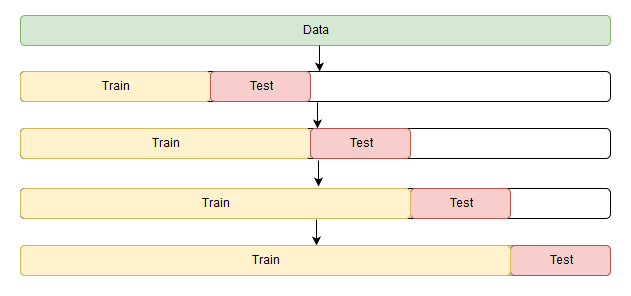

In [ ]:
pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.1 MB/s 
     |████████████████████████████████| 76 kB 3.7 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster

from joblib import dump, load # Para almacenar los modelos
import warnings

warnings.filterwarnings('ignore')

En este caso es importante convertir la columna de fechas en los índices del dataframe. 

In [ ]:
world_daily_increase_df['dates'] = pd.to_datetime(world_daily_increase_df['dates'], format = '%m/%d/%y')
world_daily_increase_df = world_daily_increase_df.set_index('dates')
world_daily_increase_df.head()

,data
dates,
2020-01-22,557
2020-01-23,100
2020-01-24,287
2020-01-25,493
2020-01-26,683


In [ ]:
def modelParameters(data, steps): 
    data_train = data[:-steps]
    forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 7)

    lags_grid = [5, 10, 15, 20]                           # ventana temporal

    param_grid = {'n_estimators': [50, 100, 500],         # número de árboles 
                  'max_depth': [3, 5, 10, 15]}

    resultados_grid = grid_search_forecaster(
                            forecaster         = forecaster,
                            y                  = data_train['data'],
                            param_grid         = param_grid,
                            lags_grid          = lags_grid,
                            steps              = steps,
                            refit              = True,
                            metric             = 'mean_squared_error',
                            initial_train_size = int(len(data_train)*0.5),
                            fixed_train_size   = False,
                            return_best        = True,
                            verbose            = False
                       )
    return resultados_grid

In [ ]:
def predictModel(data, steps, max_depth, n_estimators, lags): 
    data_train = data[:-steps]
    data_test  = data[-steps:] 
    regressor = RandomForestRegressor(max_depth = max_depth, 
                                      n_estimators = n_estimators, random_state=123)
    
    forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = lags
             )

    forecaster.fit(y=data_train['data'])
    predictions = forecaster.predict(steps = steps)
    
    dfPred = pd.DataFrame(predictions)
    dfPred.index = pd.date_range(start=data_test.index.min(), end=data_test.index.max())

    dfPred['Real']  = data_test['data'].values
    dfPred['Diference'] = np.abs((dfPred['Real'] - dfPred['pred']))
    print(mean_absolute_percentage_error(dfPred['Real'], dfPred['pred'] ), "%")
    
    return dfPred, forecaster

In [ ]:
def predGraph(dataTrain, dataTest, dataPred, zoom = 0):
    fig, ax = plt.subplots(figsize = (15, 5))
    dataTrain['data'][zoom:].plot(ax = ax, label = 'train')
    dataTest['data'].plot(ax = ax, label = 'test')
    dataPred['pred'].plot(ax = ax, label = 'predicciones')
    ax.legend();
    return

In [ ]:
steps = 30
result1 = modelParameters(world_daily_increase_df, steps)

Number of models compared: 36


loop lags_grid: 100%|██████████████████████████████████████| 4/4 [12:35<00:00, 188.82s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 415157306485.7104



In [ ]:
steps = 30
max_depth = 10
n_estimators = 100
lags = 5
pred, model1 = predictModel(world_daily_increase_df, steps, max_depth, n_estimators, lags)

24.70925345727678 %


In [ ]:
world_daily_increase_df.loc[world_daily_increase_df.index[-1]]

data    318805
Name: 2022-09-10 00:00:00, dtype: int64

In [ ]:
newDf = pd.DataFrame(pd.date_range(start='2022-09-10', end='2022-10-09'), columns = ['dates'])
newDf = newDf.set_index(['dates']) 

In [ ]:
newDf.head()

""
dates
2022-09-10
2022-09-11
2022-09-12
2022-09-13
2022-09-14


In [ ]:
predictions = model1.predict(steps=30)
dfPred = pd.DataFrame(predictions)
dfPred.index = pd.date_range(start=newDf.index.min(), end=newDf.index.max()) 
dfPred.head()

,pred
2022-09-10,825953.892064
2022-09-11,742014.450404
2022-09-12,670674.356322
2022-09-13,758276.215054
2022-09-14,734707.819860


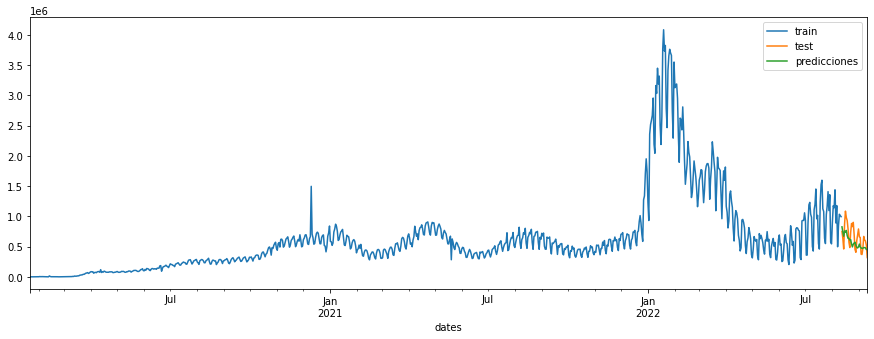

In [ ]:
predGraph(world_daily_increase_df[:-steps], world_daily_increase_df[-steps:], pred,0)

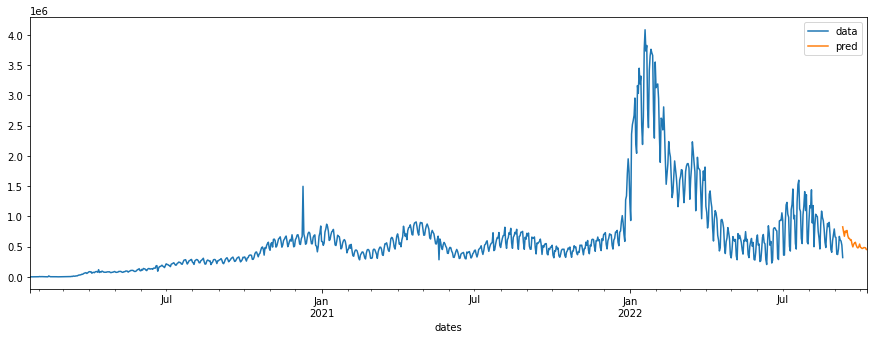

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
world_daily_increase_df['data'][:].plot(ax = ax, label = 'data')
dfPred['pred'].plot(ax = ax, label = 'pred')
ax.legend();

## Producción 

El modelo generado lo podemos guardar para utilizarlo de una manera más practica, para esto utilizaremos la librería ``joblib``

In [ ]:
# Para guardar los modelos
dump(model1, filename='model1.py')

# Para cargar los modelos
model = load('model1.py')

In [ ]:
newDf = pd.DataFrame(pd.date_range(start='2022-09-10', end='2022-09-19'), columns = ['dates'])
newDf = newDf.set_index(['dates']) 

In [ ]:
predictions = model.predict(steps=10)
dfPred = pd.DataFrame(predictions)
dfPred.index = pd.date_range(start=newDf.index.min(), end=newDf.index.max()) 
dfPred.head()

,pred
2022-09-10,825953.892064
2022-09-11,742014.450404
2022-09-12,670674.356322
2022-09-13,758276.215054
2022-09-14,734707.819860


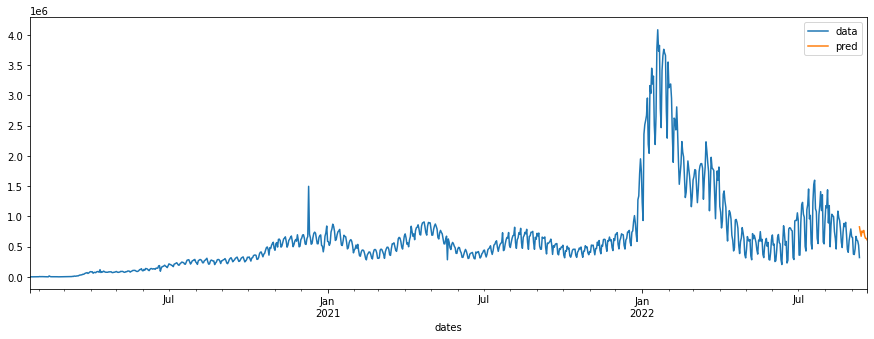

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
world_daily_increase_df['data'][:].plot(ax = ax, label = 'data')
dfPred['pred'].plot(ax = ax, label = 'pred')
ax.legend();

# ⛳Ahora es tu turno!

Vas a revisar los diferentes método de suavizado o filtrado de la señal y vas a volver a entrenar el modelo. 
Qué opinas?
Mejoró el resultado?
